In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.compose
import imblearn.over_sampling
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection
from sklearn.model_selection import KFold, cross_val_score
import sklearn.linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics
import sklearn.pipeline
import sklearn.impute
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving start_ups.csv to start_ups.csv


In [ ]:
df = pd.read_csv('start_ups.csv')
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,1/5/2015,1/5/2015
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,9/4/2014,3/1/2014,10/14/2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,1/30/2014,1/30/2014
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,1/1/2007,3/19/2008,3/19/2008
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,1/1/2010,7/24/2014,7/24/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,4/1/2012,4/1/2012
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,5/13/2012,11/1/2011,3/1/2014
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,1/1/2011,8/1/2014,8/1/2014
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,1/1/2014,1/1/2015,1/1/2015


In [ ]:
df.shape

(66368, 14)

In [ ]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

In [ ]:
df.dtypes

,0
permalink,object
name,object
homepage_url,object
category_list,object
funding_total_usd,object
status,object
country_code,object
state_code,object
region,object
city,object


Data Preprocessing

In [ ]:
#check for missing values
df.isnull().sum()


,0
permalink,0
name,1
homepage_url,5058
category_list,3148
funding_total_usd,0
status,0
country_code,6958
state_code,8547
region,8030
city,8028


Handling Missing Values and Errors.

In [ ]:
#dropping 'permalink', 'homepage_url', 'country_code', 'state_code', 'city', 'founded_at', 'region' columns because they have very large counts of missing values and they are also not columns we need for the pipeline.
# Drop columns by name
df = df.drop(columns=['permalink', 'homepage_url', 'country_code', 'state_code', 'city', 'founded_at', 'region'], axis=1)
df

,name,category_list,funding_total_usd,status,funding_rounds,first_funding_at,last_funding_at
0,#fame,Media,10000000,operating,1,1/5/2015,1/5/2015
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,2,3/1/2014,10/14/2014
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878,operating,1,1/30/2014,1/30/2014
3,0-6.com,Curated Web,2000000,operating,1,3/19/2008,3/19/2008
4,004 Technologies,Software,-,operating,1,7/24/2014,7/24/2014
...,...,...,...,...,...,...,...
66363,ZZNode Science and Technology,Enterprise Software,1587301,operating,1,4/1/2012,4/1/2012
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304,operating,4,11/1/2011,3/1/2014
66365,ÁERON,NaN,-,operating,1,8/1/2014,8/1/2014
66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192,operating,1,1/1/2015,1/1/2015


In [ ]:
#The 'funding_total_usd' column is supposed to be 'int' type but it shows as 'object' type, so I checked all the values in the column to see why it appears as object and not int.
df['funding_total_usd']

,funding_total_usd
0,10000000
1,700000
2,3406878
3,2000000
4,-
...,...
66363,1587301
66364,114304
66365,-
66366,18192


In [ ]:
#change all the non-number values in column 'funding_total_usd' to NaN values.
df['funding_total_usd'] = df['funding_total_usd'].replace(r'[^0-9]', np.nan, regex=True)

df['funding_total_usd']

,funding_total_usd
0,10000000
1,700000
2,3406878
3,2000000
4,NaN
...,...
66363,1587301
66364,114304
66365,NaN
66366,18192


Handling missing values

In [ ]:
#to handle the missing values in the column 'funding_total_usd', I checked for the skewness to determine whether to impute its mean or median values.
df['funding_total_usd'].skew() #check the skewness of column 'funding_total_usd'

100.09862985676192

In [ ]:
#Since the skewness of column "funding_total_usd" is greater than 1, I imputed its missing values with its median
df['funding_total_usd'] = df['funding_total_usd'].fillna(df['funding_total_usd'].median())
df['funding_total_usd']

,funding_total_usd
0,10000000
1,700000
2,3406878
3,2000000
4,2000000.0
...,...
66363,1587301
66364,114304
66365,2000000.0
66366,18192


In [ ]:
#check for missing values in current dataframe.
df.isnull().sum()

,0
name,1
category_list,3148
funding_total_usd,0
status,0
funding_rounds,0
first_funding_at,24
last_funding_at,0


In [ ]:
#handle missing values in column 'category_list'
mode_value = df['category_list'].mode()[0]
df['category_list'].fillna(mode_value, inplace=True)
df['category_list']

,category_list
0,Media
1,Application Platforms|Real Time|Social Network...
2,Apps|Games|Mobile
3,Curated Web
4,Software
...,...
66363,Enterprise Software
66364,Advertising|Mobile|Web Development|Wireless
66365,Software
66366,Consumer Electronics|Internet of Things|Teleco...


In [ ]:
df.dtypes #to view the current data types

,0
name,object
category_list,object
funding_total_usd,object
status,object
funding_rounds,int64
first_funding_at,object
last_funding_at,object


In [ ]:
df.isnull().sum() #check for missing values in current dataframe

,0
name,1
category_list,0
funding_total_usd,0
status,0
funding_rounds,0
first_funding_at,24
last_funding_at,0


In [ ]:
#dropping rows with missing values in columns 'name' and 'first_funding_at' because their total missing values is less than 1% of the entire dataset.
df = df.dropna(subset=['name', 'first_funding_at'])
df

,name,category_list,funding_total_usd,status,funding_rounds,first_funding_at,last_funding_at
0,#fame,Media,10000000,operating,1,1/5/2015,1/5/2015
1,:Qounter,Application Platforms|Real Time|Social Network...,700000,operating,2,3/1/2014,10/14/2014
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878,operating,1,1/30/2014,1/30/2014
3,0-6.com,Curated Web,2000000,operating,1,3/19/2008,3/19/2008
4,004 Technologies,Software,2000000.0,operating,1,7/24/2014,7/24/2014
...,...,...,...,...,...,...,...
66363,ZZNode Science and Technology,Enterprise Software,1587301,operating,1,4/1/2012,4/1/2012
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304,operating,4,11/1/2011,3/1/2014
66365,ÁERON,Software,2000000.0,operating,1,8/1/2014,8/1/2014
66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192,operating,1,1/1/2015,1/1/2015


In [ ]:
df.isnull().sum()

,0
name,0
category_list,0
funding_total_usd,0
status,0
funding_rounds,0
first_funding_at,0
last_funding_at,0


Data Collection.
This data was downloaded from; https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase


In [ ]:
#Data will now be split into test and train sets
df_train, df_test = sklearn.model_selection.train_test_split(df)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)

df_train: (49757, 7)
df_test: (16586, 7)


<Axes: >

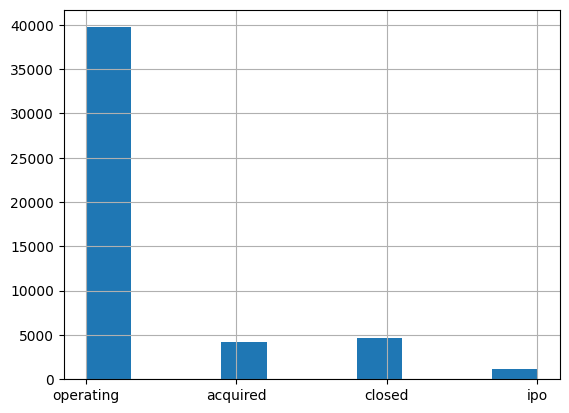

In [ ]:
df_train["status"].hist()

Choosing target label and splitting features. The 'status' column is the chosen target. I combined 'operating' and 'ipo'values to mean start up is successful. This is represent numerically as '1' and '0' represents not successful ie, 'closed' and 'acquired' values.

In [ ]:
df_train['status1']=df_train.apply(lambda row: 1 if row['status'] == 'operating'or row['status'] == 'ipo' else 0, axis=1)
df_train.drop(['status'], axis=1, inplace=True)
df_train.rename(columns={'status1': 'status'}, inplace=True)
df_train

,name,category_list,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,status
33495,Lumicell Diagnostics,Hardware + Software|Health Diagnostics,3713582,2,6/2/2011,1/3/2014,1
21208,Foodily,Cooking|Hospitality|Recipes,7720000,2,6/25/2010,4/1/2013,0
55025,Streetline,Hardware + Software|Mobile|SaaS,50000000,4,7/1/2010,7/1/2014,1
30986,Knox Payments,Enterprise Software|Finance|Mobile|Mobile Paym...,1605000,3,4/1/2013,8/21/2014,1
10381,Celona Technologies,Software,18890000,3,8/1/2005,2/2/2010,0
...,...,...,...,...,...,...,...
62207,Virtway,3D|Enterprise Software|Entertainment|Games|Sal...,647567,1,12/30/2011,12/30/2011,1
48627,Roam Analytics,Big Data Analytics|Business Intelligence|Life ...,11339998,2,12/26/2013,7/1/2015,1
33311,Lovejuice,Hospitality,8928808,2,5/29/2006,7/18/2007,1
47802,Renovatio IT Solutions,Apps|Games|Home Automation|Mobile|Software,30000,1,8/28/2014,8/28/2014,1


In [ ]:
x_train = df_train.drop(["status"], axis=1) #drop the chosen target to separate it from remaining features in the train set
y_train = df_train["status"] #train the chosen target; 'status'
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_test = df_test.drop(["status"], axis=1) #drop the chosen target to separate it from remaining features in the test set
y_test = df_test["status"] #test the chosen target; 'status'
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

x_train: (49757, 6)
y_train: (49757,)
x_test: (16586, 6)
y_test: (16586,)


Feature Engineering

Label Encoding

In [ ]:
#use label encoding to transform all values in all columns in the x_train set to numerical values
# Create a LabelEncoder object

label_encoder = LabelEncoder()
for df in x_train.columns:
  if x_train[df].dtype == 'object':
# Fit and transform the column using LabelEncoder
    combined_data = pd.concat([x_train[df], x_test[df]])
# Convert all values to strings before fitting
    combined_data = combined_data.astype(str)
    label_encoder.fit(combined_data)
    x_train[df] = label_encoder.transform(x_train[df].astype(str))
    x_test[df] = label_encoder.transform(x_test[df].astype(str))

# Print the updated DataFrame
print(x_train)

        name  category_list  funding_total_usd  funding_rounds  \
33495  31550          22104              10172               2   
21208  20226          13956              15977               2   
55025  52231          22167              12560               4   
30986  29112          19382               3740               3   
10381  10277          26955               4963               3   
...      ...            ...                ...             ...   
62207  59222            199              14583               1   
48627  46046           7491               1001               2   
33311  31404          22969              17152               2   
47802  45330           5306               8503               1   
54661  51887          19341                 29               6   

       first_funding_at  last_funding_at  
33495              3391              296  
21208              3463             2300  
55025              3640             3432  
30986              2455            

Normalizing the dataset

In [ ]:
transformer = sklearn.preprocessing.Normalizer().fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)
print(x_train)

[[7.88985399e-01 5.52764921e-01 2.54375895e-01 5.00149223e-05
  8.48003007e-02 7.40220850e-03]
 [6.83214158e-01 4.71419796e-01 5.39687165e-01 6.75580103e-05
  1.16976695e-01 7.76917118e-02]
 [8.95459980e-01 3.80036020e-01 2.15331457e-01 6.85768972e-05
  6.24049765e-02 5.88389778e-02]
 ...
 [7.34078403e-01 5.36907618e-01 4.00933409e-01 4.67506307e-05
  7.27673566e-02 8.25616138e-02]
 [9.68630114e-01 1.13380794e-01 1.81695607e-01 2.13684120e-05
  9.18200662e-02 8.63497527e-02]
 [9.33723259e-01 3.48047518e-01 5.21864330e-04 1.07971930e-04
  4.70217757e-02 6.93719653e-02]]


Balancing the chosen target. From the histogram on the 'status' column, the number of startups operating are disproportionately higher than those closed, so I balanced it.

In [ ]:
print(y_train.unique()) # Check unique values of y_train

[1 0]


Balancing the data by oversampling using SMOTE

In [ ]:
sm = imblearn.over_sampling.SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)
y_train.value_counts()

,count
status,
1,40879
0,40879


Model Selection
The four models that will be used here are;
1. Random Forest
2. Gradient Boosting Machine
3. Decision Tree
4. XGBoost

1. Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True)
cv = cross_val_score(rf, x_train, y_train, cv=kf, scoring='accuracy')
print(cv)
print(cv.mean()*100, '%')

[0.79880137 0.80155333 0.79537671 0.80545532 0.79982876]
80.02030978972662 %


2. Gradient Boosting Machine

In [ ]:
grad = GradientBoostingClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True)
cv = cross_val_score(grad, x_train, y_train, cv=kf, scoring='accuracy')
print(cv)
print(cv.mean()*100, '%')

[0.55192025 0.55369374 0.56011497 0.55342181 0.55641857]
55.51138679106743 %


3. Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True)
cv = cross_val_score(dt, x_train, y_train, cv=kf, scoring='accuracy')
print(cv)
print(cv.mean()*100, '%')

[0.70437867 0.70223826 0.69404354 0.69971256 0.69341325]
69.87572544741035 %


4. XGBoost

In [ ]:
xg = XGBClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True)
cv = cross_val_score(dt, x_train, y_train, cv=kf, scoring='accuracy')
print(cv)
print(cv.mean()*100, '%')

[0.70401174 0.70774217 0.70413405 0.69347441 0.69879518]
70.16315101465992 %


**Hyperparameter Tuning**
  
  From the four tested models, random Forest has the highest accuracy, hence it is the best for this dataset.
  GridsearchCV will be used to find Random Forest's optimal hyperparameters

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
# Step 3: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used when building trees
}

# Step 4: Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
# Step 5: Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)
# Step 6: Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
# Step 7: Make predictions using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

NameError: name 'grid_search' is not defined

# New Section